# Time Series Classification with Deep Learning

In this notebook the different model architectures are applied to one dataset

In [45]:
%matplotlib inline
import torch

# set default figure size 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# get helper functions
from utils.utils import UCRDataset, UCRTorchTrainer, importance_per_class
from utils.scheduled_optimizer import ScheduledOptim

# get model architectures
from nets.resnet import RESNET
from nets.fcn import Fcn
from nets.transformer_model import UnivarTransformer

## Dataset

For demonstration purposes the 'Gun Point' dataset is used. It has a handy size and is also one of the sets, which has been used by [Fawaz et. al.](https://github.com/hfawaz/dl-4-tsc) in their paper.

In [2]:
# relative path to datasets
DATA_PATH = './UCR_archive/UCR_TS_Archive_2015'

# define dataset to use
DATA_SET = 'Gun_Point'

# create train and test set
train_set = UCRDataset(f'{DATA_PATH}/{DATA_SET}/{DATA_SET}_TRAIN')
test_set = UCRDataset(f'{DATA_PATH}/{DATA_SET}/{DATA_SET}_TEST')

print('Train Set:')
train_set.info()
print('')
print('Test Set:')
test_set.info()

Train Set:
Signal length: 150 points
Size of dataset: 50 entries
Label count:
2    26
1    24
Name: 0, dtype: int64

Test Set:
Signal length: 150 points
Size of dataset: 150 entries
Label count:
1    76
2    74
Name: 0, dtype: int64


The signals have a lenght of 150 time steps. The train set is rather small, with just 50 entries. The test set has three times as many entries. There are just two classes and both sets are more or less balanced.

In [22]:
BATCH_SIZE = 50

# create data loaders
traindata_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True
    )

testdata_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=BATCH_SIZE,
    shuffle=False
    )

## FCN

First, we use the fully convolutional model.

In [31]:
# some training related hyper-parameters
EPOCHS = 200
LEARNING_RATE = 1e-3


net = Fcn(train_set.siglen, train_set.n_target_classes)
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)

Running on device: cpu


### Training
The models should converge quite quickly. No model or log is saved and early stopping is turned off.

In [32]:
# set up model trainer class
model_trainer = UCRTorchTrainer(
    model=net,
    criterion=torch.nn.CrossEntropyLoss(),
    optimizer=optimizer
    )

# start training
model_trainer.train(
    traindata_loader,
    EPOCHS,
    testdata_loader=testdata_loader,
    early_stopping=1000000, # large value turns early stopping off
    save_as='', # no model is saved
    save_log_as='' # no log is saved
    )

Epoch: 0 - train loss:  0.014012 - train accuracy:  0.480000 - test accuracy:  0.493333
Epoch: 1 - train loss:  0.012539 - train accuracy:  0.700000 - test accuracy:  0.486667
Epoch: 2 - train loss:  0.011908 - train accuracy:  0.720000 - test accuracy:  0.553333
Epoch: 3 - train loss:  0.011397 - train accuracy:  0.720000 - test accuracy:  0.540000
Epoch: 4 - train loss:  0.010927 - train accuracy:  0.800000 - test accuracy:  0.540000
Epoch: 5 - train loss:  0.010608 - train accuracy:  0.780000 - test accuracy:  0.540000
Epoch: 6 - train loss:  0.010307 - train accuracy:  0.820000 - test accuracy:  0.546667
Epoch: 7 - train loss:  0.009927 - train accuracy:  0.820000 - test accuracy:  0.553333
Epoch: 8 - train loss:  0.009625 - train accuracy:  0.820000 - test accuracy:  0.560000
Epoch: 9 - train loss:  0.009354 - train accuracy:  0.820000 - test accuracy:  0.573333
Epoch: 10 - train loss:  0.009074 - train accuracy:  0.820000 - test accuracy:  0.586667
Epoch: 11 - train loss:  0.0088

Epoch: 93 - train loss:  0.000112 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 94 - train loss:  0.000109 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 95 - train loss:  0.000107 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 96 - train loss:  0.000104 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 97 - train loss:  0.000102 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 98 - train loss:  0.000099 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 99 - train loss:  0.000097 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 100 - train loss:  0.000095 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 101 - train loss:  0.000092 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 102 - train loss:  0.000090 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 103 - train loss:  0.000089 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 104 - trai

Epoch: 184 - train loss:  0.000028 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 185 - train loss:  0.000028 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 186 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 187 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 188 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 189 - train loss:  0.000026 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 190 - train loss:  0.000026 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 191 - train loss:  0.000026 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 192 - train loss:  0.000026 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 193 - train loss:  0.000026 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 194 - train loss:  0.000025 - train accuracy:  1.000000 - test accuracy:  1.000000
Epoch: 195

Now we can take a look at the development of the training loss and the test and training accuracy.

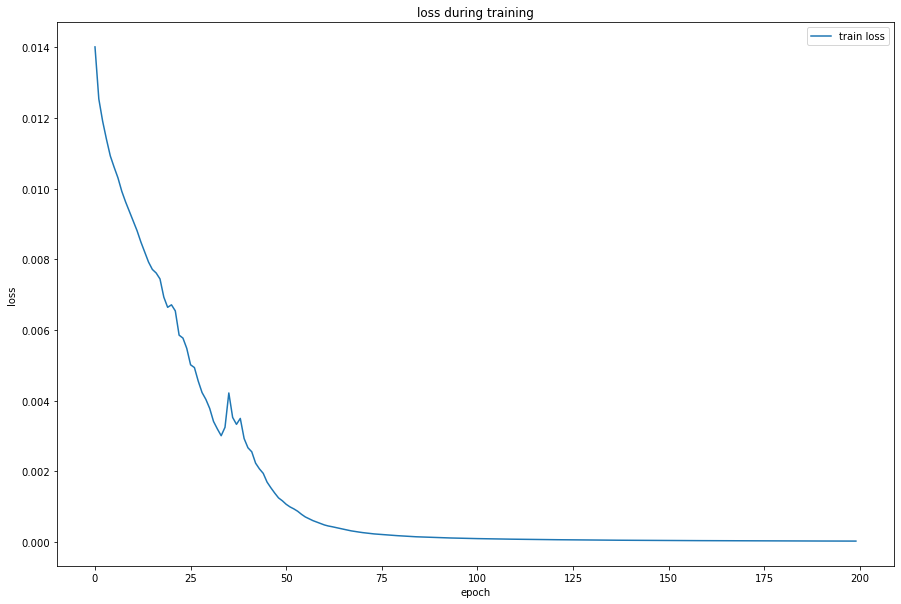

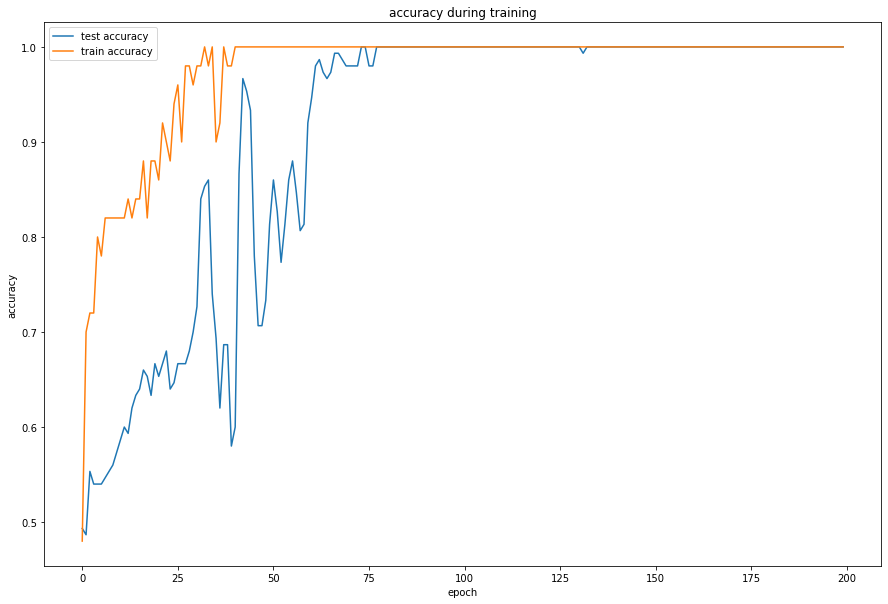

In [46]:
model_trainer.plot_loss()
model_trainer.plot_acc()

The model seems to converge and is able to correctly classify all signals of the training and the test sset.

### Visualization
Class activation maps (CAM) allow to highlight features of the input signal, which are more important for the classification. Red corresponds to a more important part and blue to less important.

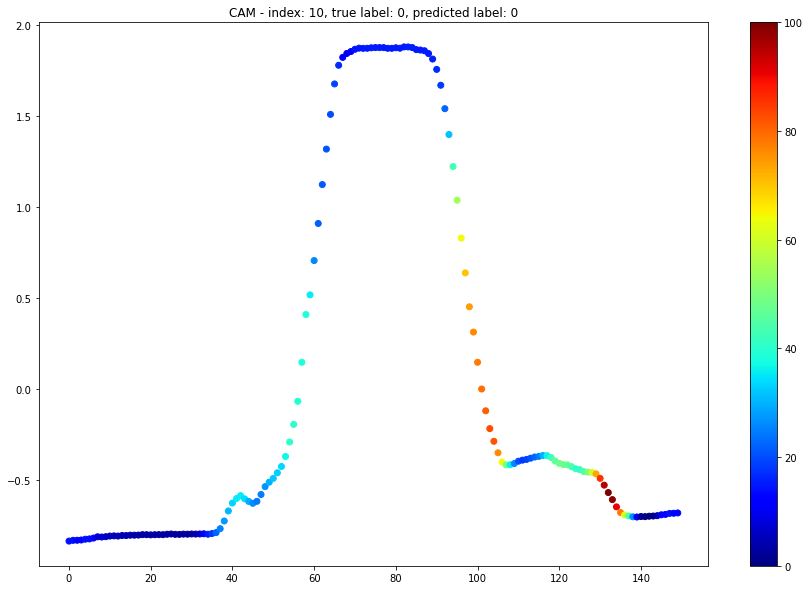

In [47]:
idx = 10
_ = model_trainer.show_cam(testdata_loader, idx)

More interesting than just a single signal is to see all signals with the same label. This allows better interpretations, why a certain time series was classified into one ore the other category.

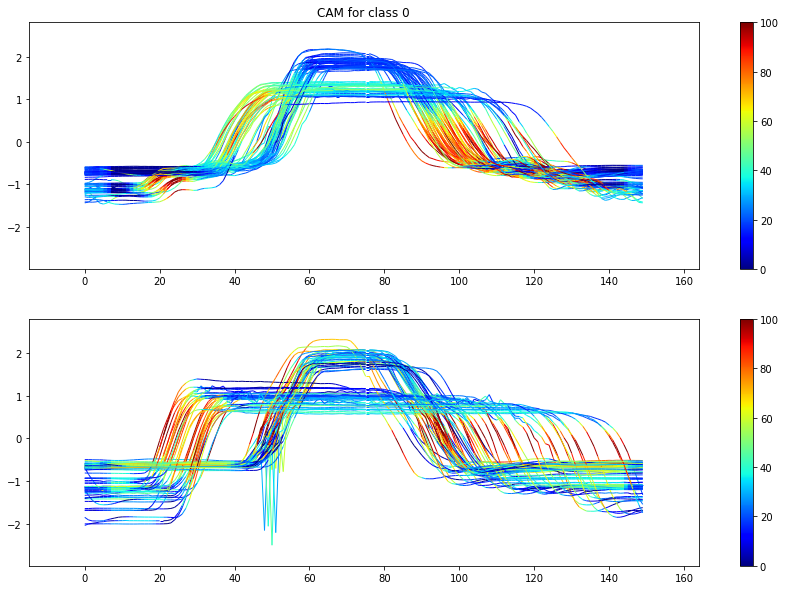

In [48]:
importance_per_class(model_trainer, testdata_loader, mode='CAM')

## ResNet

Now we can do the same for the Resnet architecture.

In [54]:
# some training related hyper-parameters
EPOCHS = 150
LEARNING_RATE = 1e-3

net = RESNET(train_set.siglen, train_set.n_target_classes)
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)

Running on device: cpu


### Training

In [55]:
# set up model trainer class
model_trainer = UCRTorchTrainer(
    model=net,
    criterion=torch.nn.CrossEntropyLoss(),
    optimizer=optimizer
    )

# start training
model_trainer.train(
    traindata_loader,
    EPOCHS,
    testdata_loader=testdata_loader,
    early_stopping=1000000, # large value turns early stopping off
    save_as='', # no model is saved
    save_log_as='' # no log is saved
    )

Epoch: 0 - train loss:  0.016551 - train accuracy:  0.480000 - test accuracy:  0.506667
Epoch: 1 - train loss:  0.012283 - train accuracy:  0.620000 - test accuracy:  0.506667
Epoch: 2 - train loss:  0.010785 - train accuracy:  0.700000 - test accuracy:  0.506667
Epoch: 3 - train loss:  0.010901 - train accuracy:  0.740000 - test accuracy:  0.506667
Epoch: 4 - train loss:  0.008354 - train accuracy:  0.820000 - test accuracy:  0.506667
Epoch: 5 - train loss:  0.008440 - train accuracy:  0.800000 - test accuracy:  0.506667
Epoch: 6 - train loss:  0.007534 - train accuracy:  0.860000 - test accuracy:  0.533333
Epoch: 7 - train loss:  0.007305 - train accuracy:  0.840000 - test accuracy:  0.546667
Epoch: 8 - train loss:  0.006644 - train accuracy:  0.840000 - test accuracy:  0.546667
Epoch: 9 - train loss:  0.006080 - train accuracy:  0.880000 - test accuracy:  0.546667
Epoch: 10 - train loss:  0.005345 - train accuracy:  0.900000 - test accuracy:  0.546667
Epoch: 11 - train loss:  0.0046

Epoch: 92 - train loss:  0.000015 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 93 - train loss:  0.000014 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 94 - train loss:  0.000014 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 95 - train loss:  0.000014 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 96 - train loss:  0.000014 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 97 - train loss:  0.000014 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 98 - train loss:  0.000013 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 99 - train loss:  0.000013 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 100 - train loss:  0.000013 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 101 - train loss:  0.000013 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 102 - train loss:  0.000013 - train accuracy:  1.000000 - test accuracy:  0.993333
Epoch: 103 - train

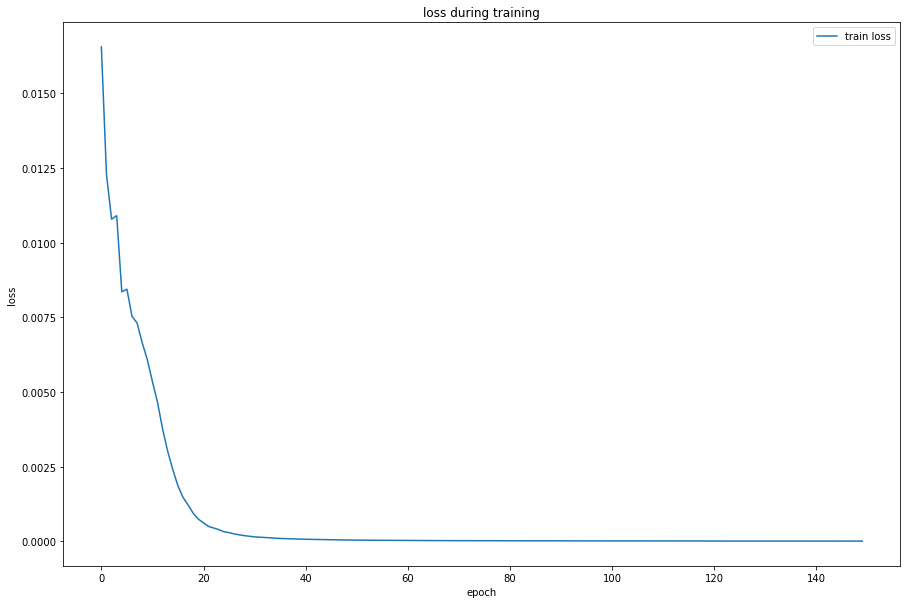

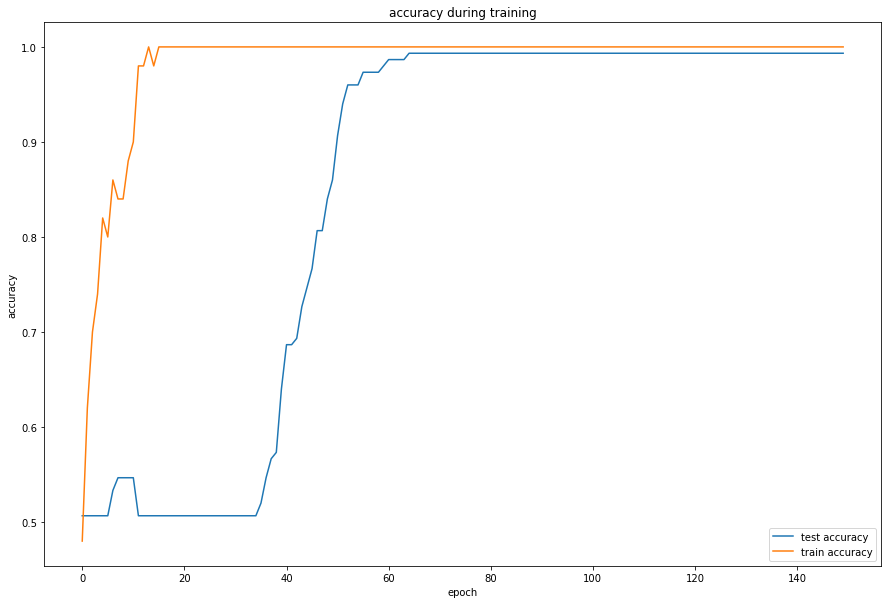

In [56]:
model_trainer.plot_loss()
model_trainer.plot_acc()

### Visualization

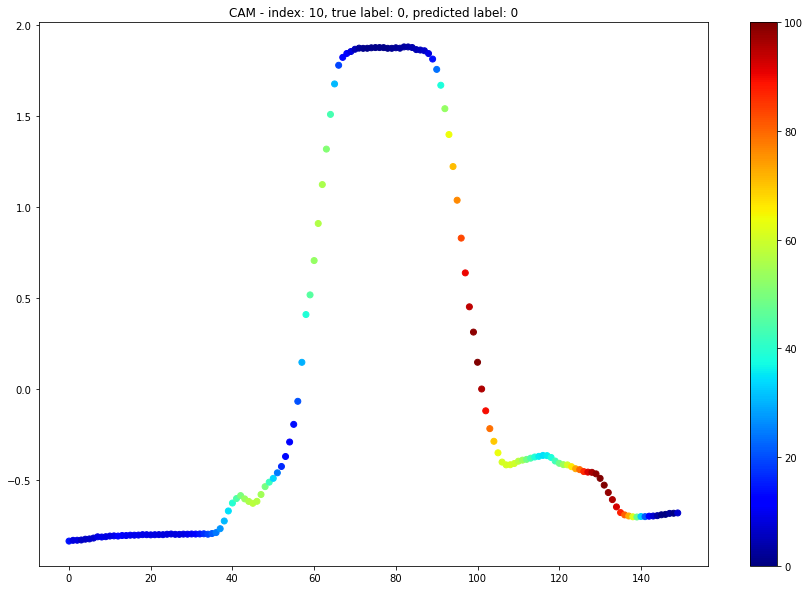

In [57]:
idx = 10
_ = model_trainer.show_cam(testdata_loader, idx)

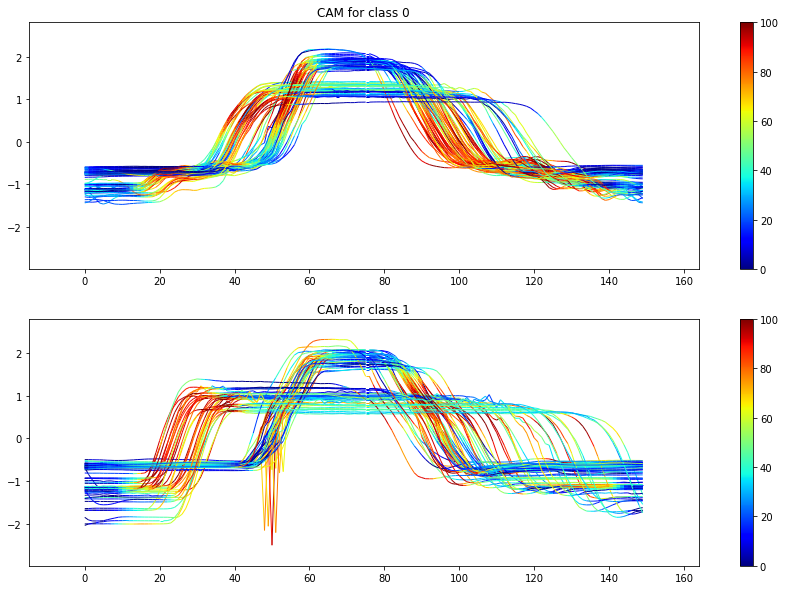

In [58]:
importance_per_class(model_trainer, testdata_loader, mode='CAM')

## Transformer

In [64]:
# some training related hyper-parameters
EPOCHS = 250
LEARNING_RATE = 1e-2

# warm up time for transformer-postLN
WARMUP = 20

net = UnivarTransformer(train_set.siglen, train_set.n_target_classes, heads=1, depth=1, emb_dim=50, layer_order='postLN')
optimizer = ScheduledOptim(torch.optim.Adam(net.parameters()), LEARNING_RATE, WARMUP)

Running on device: cpu


In [65]:
# set up model trainer class
model_trainer = UCRTorchTrainer(
    model=net,
    criterion=torch.nn.CrossEntropyLoss(),
    optimizer=optimizer
    )

# start training
model_trainer.train(
    traindata_loader,
    EPOCHS,
    testdata_loader=testdata_loader,
    early_stopping=1000000, # large value turns early stopping off
    save_as='', # no model is saved
    save_log_as='' # no log is saved
    )

Epoch: 0 - train loss:  0.017251 - train accuracy:  0.480000 - test accuracy:  0.506667 - LR:  0.000112
Epoch: 1 - train loss:  0.016865 - train accuracy:  0.480000 - test accuracy:  0.506667 - LR:  0.000224
Epoch: 2 - train loss:  0.016152 - train accuracy:  0.480000 - test accuracy:  0.506667 - LR:  0.000335
Epoch: 3 - train loss:  0.015238 - train accuracy:  0.480000 - test accuracy:  0.506667 - LR:  0.000447
Epoch: 4 - train loss:  0.014342 - train accuracy:  0.480000 - test accuracy:  0.513333 - LR:  0.000559
Epoch: 5 - train loss:  0.013752 - train accuracy:  0.460000 - test accuracy:  0.493333 - LR:  0.000671
Epoch: 6 - train loss:  0.013709 - train accuracy:  0.520000 - test accuracy:  0.493333 - LR:  0.000783
Epoch: 7 - train loss:  0.014171 - train accuracy:  0.520000 - test accuracy:  0.493333 - LR:  0.000894
Epoch: 8 - train loss:  0.014726 - train accuracy:  0.520000 - test accuracy:  0.493333 - LR:  0.001006
Epoch: 9 - train loss:  0.014953 - train accuracy:  0.520000 - t

Epoch: 78 - train loss:  0.001456 - train accuracy:  0.960000 - test accuracy:  0.960000 - LR:  0.001125
Epoch: 79 - train loss:  0.001162 - train accuracy:  1.000000 - test accuracy:  0.933333 - LR:  0.001118
Epoch: 80 - train loss:  0.001257 - train accuracy:  0.980000 - test accuracy:  0.946667 - LR:  0.001111
Epoch: 81 - train loss:  0.001019 - train accuracy:  1.000000 - test accuracy:  0.953333 - LR:  0.001104
Epoch: 82 - train loss:  0.000977 - train accuracy:  1.000000 - test accuracy:  0.940000 - LR:  0.001098
Epoch: 83 - train loss:  0.000852 - train accuracy:  1.000000 - test accuracy:  0.940000 - LR:  0.001091
Epoch: 84 - train loss:  0.000764 - train accuracy:  1.000000 - test accuracy:  0.946667 - LR:  0.001085
Epoch: 85 - train loss:  0.000687 - train accuracy:  1.000000 - test accuracy:  0.940000 - LR:  0.001078
Epoch: 86 - train loss:  0.000626 - train accuracy:  1.000000 - test accuracy:  0.960000 - LR:  0.001072
Epoch: 87 - train loss:  0.000532 - train accuracy:  1.

Epoch: 155 - train loss:  0.000057 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000801
Epoch: 156 - train loss:  0.000057 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000798
Epoch: 157 - train loss:  0.000056 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000796
Epoch: 158 - train loss:  0.000055 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000793
Epoch: 159 - train loss:  0.000055 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000791
Epoch: 160 - train loss:  0.000054 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000788
Epoch: 161 - train loss:  0.000053 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000786
Epoch: 162 - train loss:  0.000053 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000783
Epoch: 163 - train loss:  0.000052 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000781
Epoch: 164 - train loss:  0.000051 - train acc

Epoch: 233 - train loss:  0.000028 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000654
Epoch: 234 - train loss:  0.000028 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000652
Epoch: 235 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000651
Epoch: 236 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000650
Epoch: 237 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000648
Epoch: 238 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000647
Epoch: 239 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000645
Epoch: 240 - train loss:  0.000027 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000644
Epoch: 241 - train loss:  0.000026 - train accuracy:  1.000000 - test accuracy:  0.966667 - LR:  0.000643
Epoch: 242 - train loss:  0.000026 - train acc

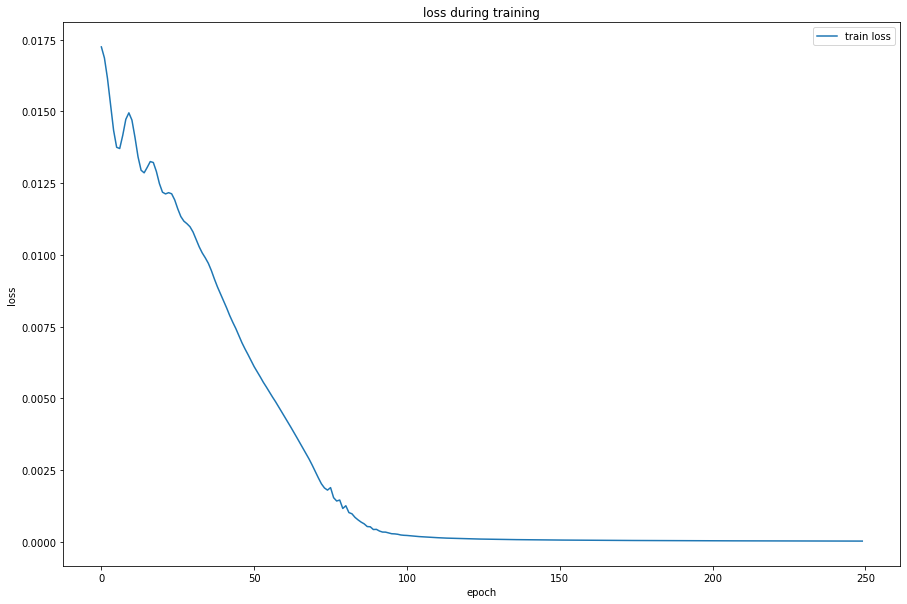

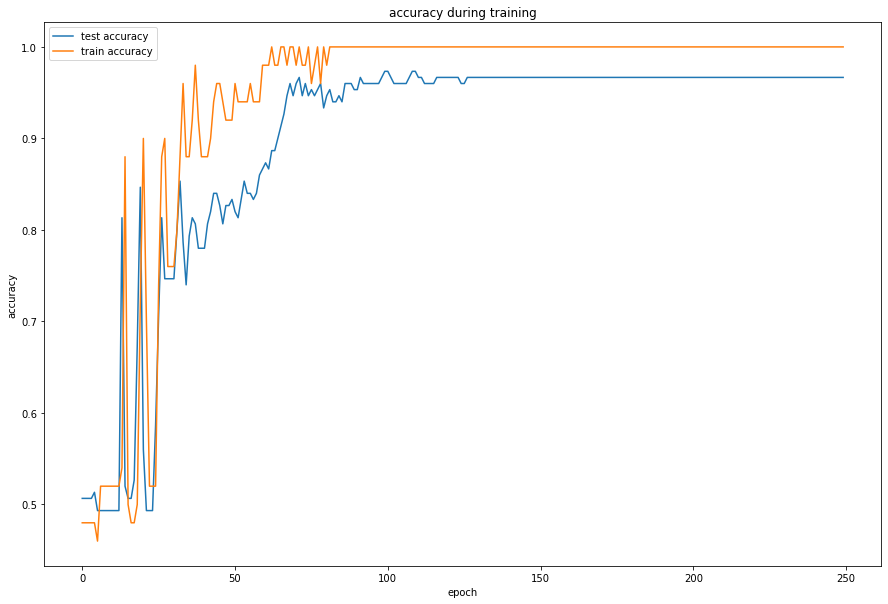

In [66]:
model_trainer.plot_loss()
model_trainer.plot_acc()

### Visualization

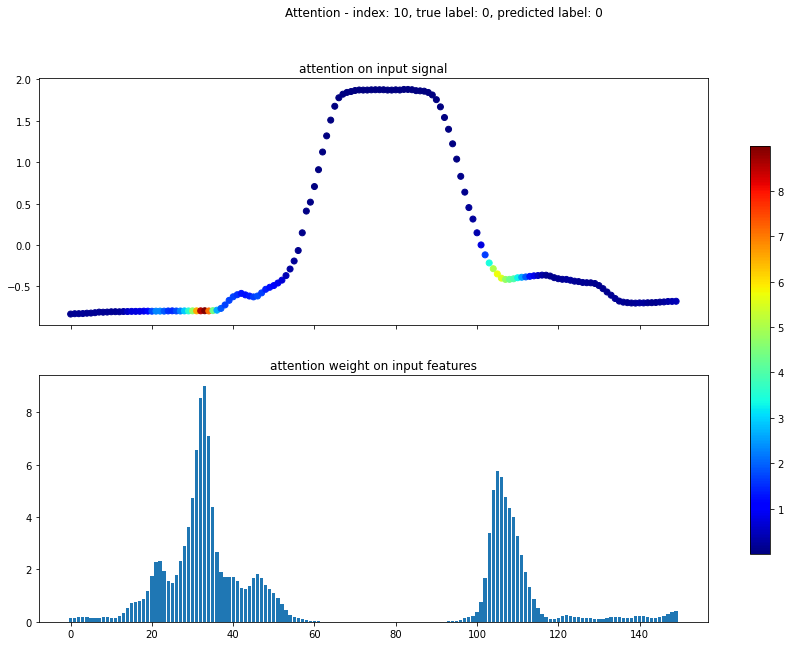

In [67]:
idx = 10
_ = model_trainer.show_attention(testdata_loader, idx, block=0, show=True)

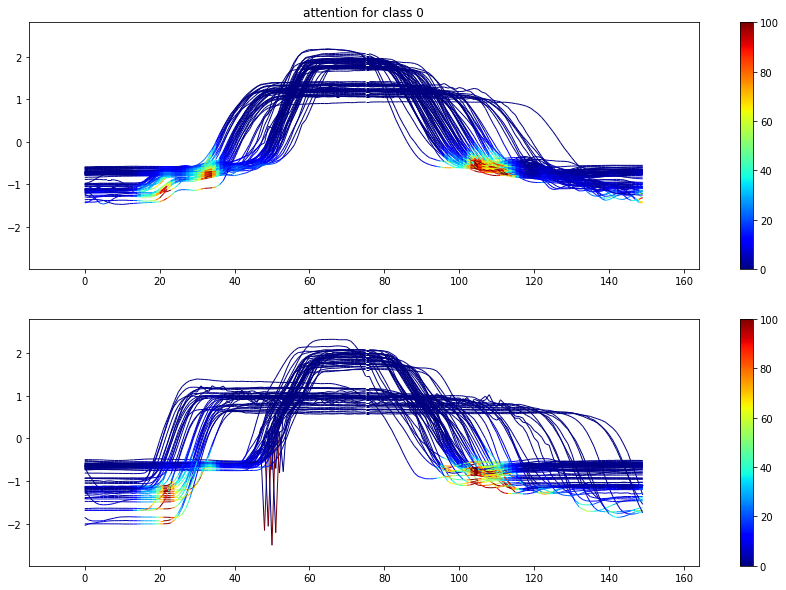

In [68]:
importance_per_class(model_trainer, testdata_loader, mode='attention')